## 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 随机生成在[-3, 3]范围内100个数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [14]:
y = x**2 * 0.5 + x + 2 + np.random.normal(0, 1, size=100)

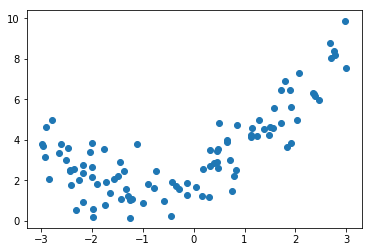

In [15]:
plt.scatter(x, y)
plt.show()

* 先使用线性回归进行拟合

In [17]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

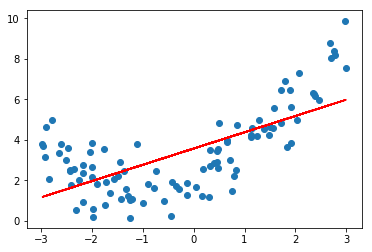

In [21]:
y_predict = linear_reg.predict(X)
# 先绘制原数据分布
plt.scatter(x, y)
# 绘制直线
plt.plot(x, y_predict, color='r')
plt.show()

### 解决方案：加入新的特征

In [28]:
(X ** 2).shape

(100, 1)

In [32]:
# 加入新特征
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [33]:
# 重新训练
linear_reg2 = LinearRegression()
linear_reg2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_predict2 = linear_reg2.predict(X2)

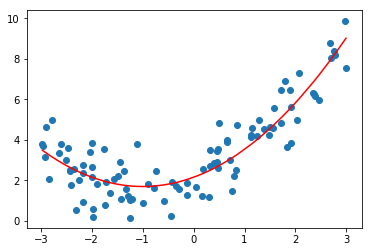

In [43]:
plt.scatter(x, y)
# 这里为绘制直线，两点即可绘制一条直线，所以需要先对x和y_predict2进行排序，保证点的顺序
# 给y_predict2传入相应x排序后的索引
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

多项式回归的基本思想就是在原有数据的基础上，增加特征(升维度),然后，使用线性回归的方式进行参数的优化，完成对数据的拟合

## Scikit-Learn中的多项式回归和Pipeline

In [44]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
# 加上正太分布的随机噪声,均值为0，方差为1
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
# 设定增加特征为2次方
poly = PolynomialFeatures(degree=2)
poly.fit(X)
# 获取处理后的X
X2 = poly.transform(X)

In [49]:
# 这里X2的特征维度为3，且第一个特征都为1，代表x^0，第二项为X^1,第三项为X^2
print(X2.shape)
X2[:5, :]

(100, 3)


array([[ 1.00000000e+00, -2.05728140e+00,  4.23240677e+00],
       [ 1.00000000e+00,  5.88767640e-01,  3.46647334e-01],
       [ 1.00000000e+00, -1.69735019e-02,  2.88099765e-04],
       [ 1.00000000e+00, -3.25293779e-01,  1.05816043e-01],
       [ 1.00000000e+00,  2.69791322e+00,  7.27873575e+00]])

In [50]:
# 下面使用线性回归方式进行拟合
linear_reg2 = LinearRegression()
linear_reg2.fit(X2, y)
y_predict2 = linear_reg2.predict(X2)

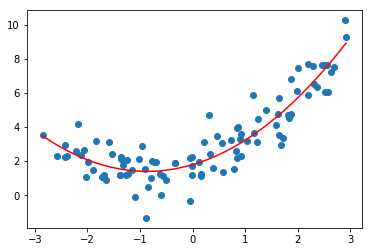

In [51]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [52]:
# 拟合系数
linear_reg2.coef_

array([0.        , 0.90812119, 0.52491748])

In [53]:
# 截距
linear_reg2.intercept_

1.791704015565284

 ## 关于PolynomialFeatures

上面使用PolynomialFeatures进行特征拓展时，原有特征只有一列[x1]    
下面对两列特征进行特征拓展，[x1, x2]

In [54]:
# 先生成含有五个样本，特征数为2的数据
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [55]:
poly = PolynomialFeatures(degree=2) # 设置最高次项为2
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(5, 6)

In [56]:
X2 # 这里做一下分析：第一列为X^0,第二列和第三列为x1，x2，第四列为x1^2,第五列为x1*x2，第六列为x2^2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

## 使用Pipeline封装多项式回归

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 构建多项式回归管道对象
# 首先理一下多项式回归的过程
# 1.先对数据进行升维，使用PolynomialFeatures
# 2.如果数据维度较大，且特征值差距较大，需要进行特征归一化，使用StandardScaler
# 3.然后进行线性回归处理，使用LinearRegression
# Pipeline构造函数传入一个list
# list中的每个元素又为多个tuple，tuple的第一个元素为相应操作的名称，第二个元素为实例化对象
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("linear_reg", LinearRegression())
])

In [61]:
# 构建虚拟数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [62]:
# 调用管道
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

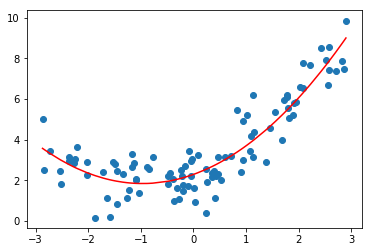

In [63]:
# 绘制拟合结果
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()